##### Taken from [02 - Real Estate Regression Challenge.ipynb](https://github.com/MicrosoftDocs/ml-basics/blob/master/challenges/02%20-%20Real%20Estate%20Regression%20Challenge.ipynb)

## Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> Citation: The data used in this exercise originates from the following study:
> Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following to load the data:

In [1]:
import pandas as pd

# loading the training dataset
data = pd.read_csv("data/real_estate.csv")
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

 - transaction_date - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
 - house_age - the house age (in years)
 - transit_distance - the distance to the nearest light rail station (in meters)
 - local_convenience_stores - the number of convenience stores within walking distance
 - latitude - the geographic coordinate, latitude
 - longitude - the geographic coordinate, longitude
 - price_per_unit house price of unit area (3.3 square meters)


## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the price_per_unit label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than 7) when evaluated against a test subset of data.


In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
%matplotlib inline

In [3]:
features = ['transaction_date', 'house_age', 'transit_distance', 'local_convenience_stores', 'latitude', 'longitude']
data[features + ['price_per_unit']].describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


/tmp/ipykernel_113912/4165585811.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


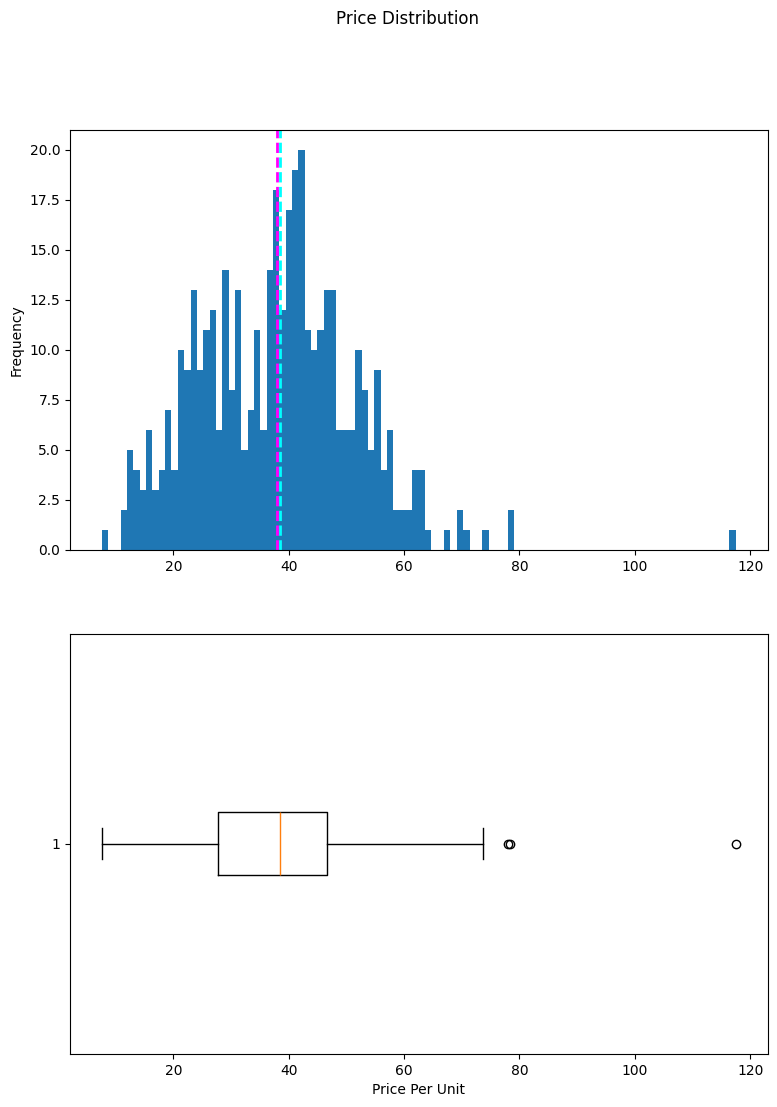

In [4]:
# Explore the data

# Get the label column
label = data['price_per_unit']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Price Per Unit')

# Add a title to the Figure
fig.suptitle('Price Distribution')

# Show the figure
fig.show()


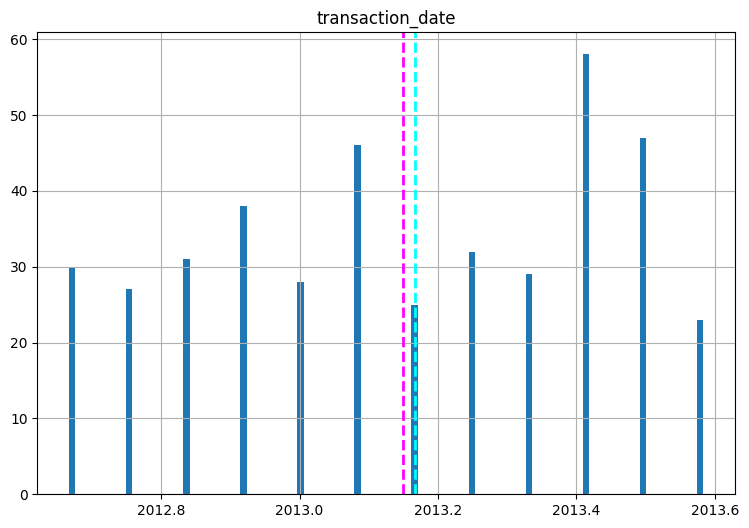

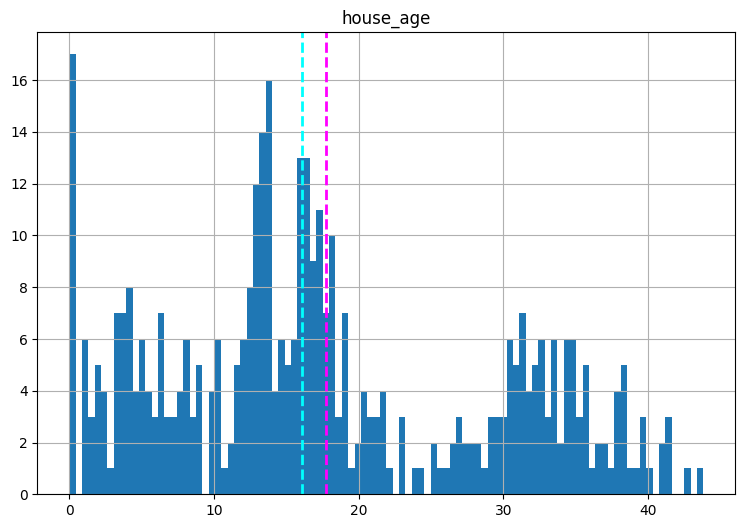

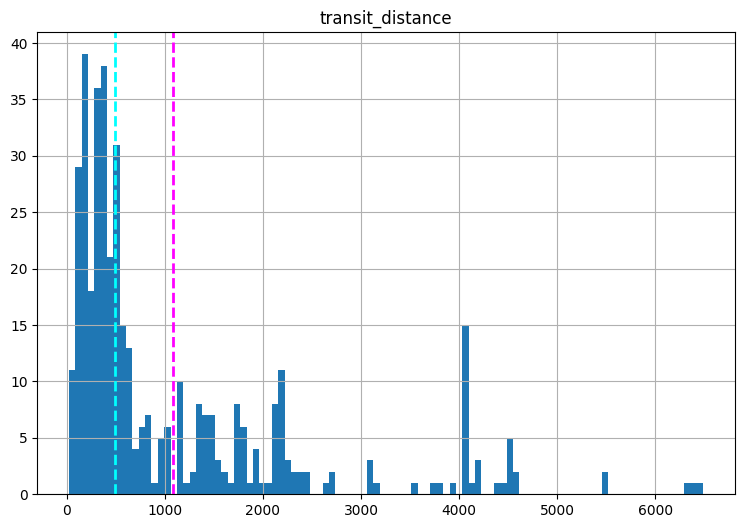

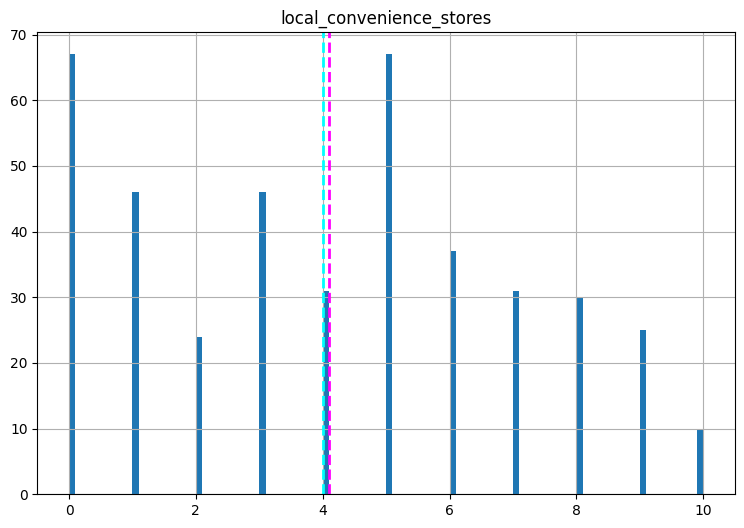

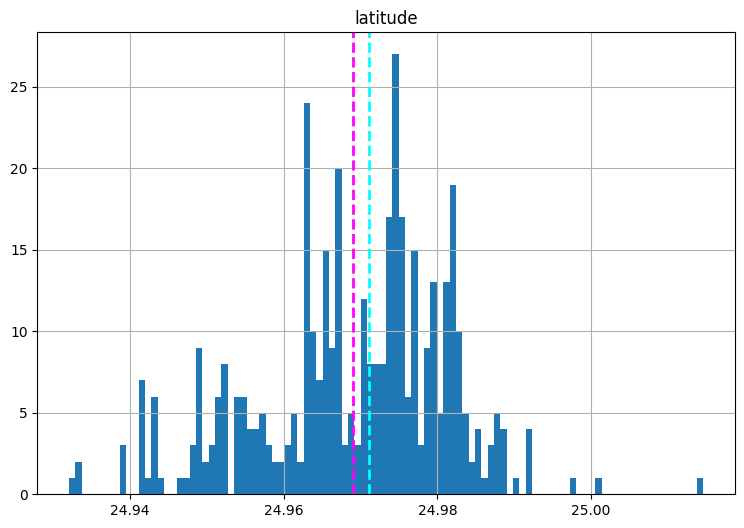

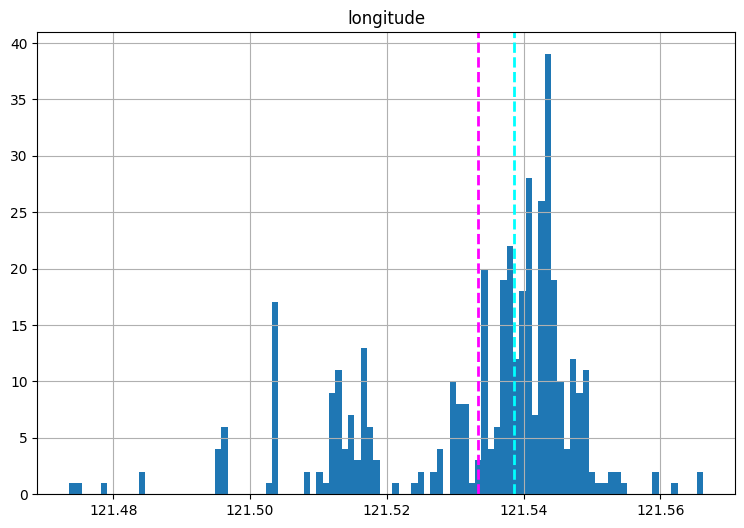

In [5]:
# Plot a histogram for each feature
for col in features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

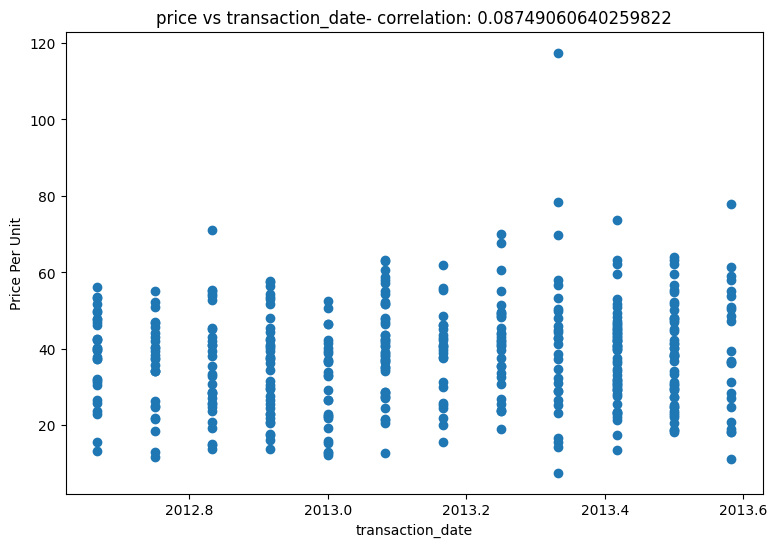

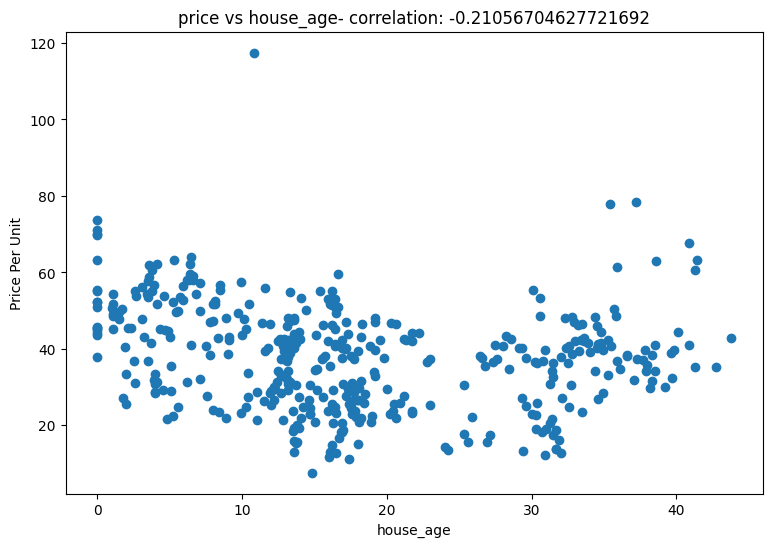

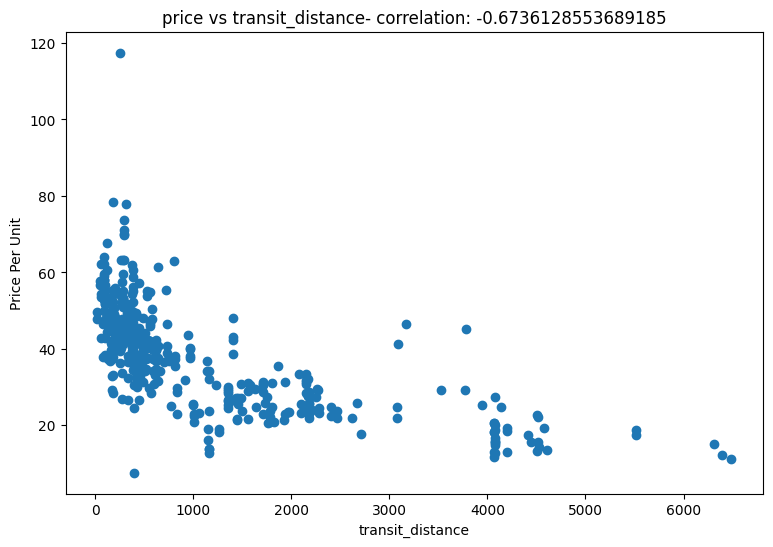

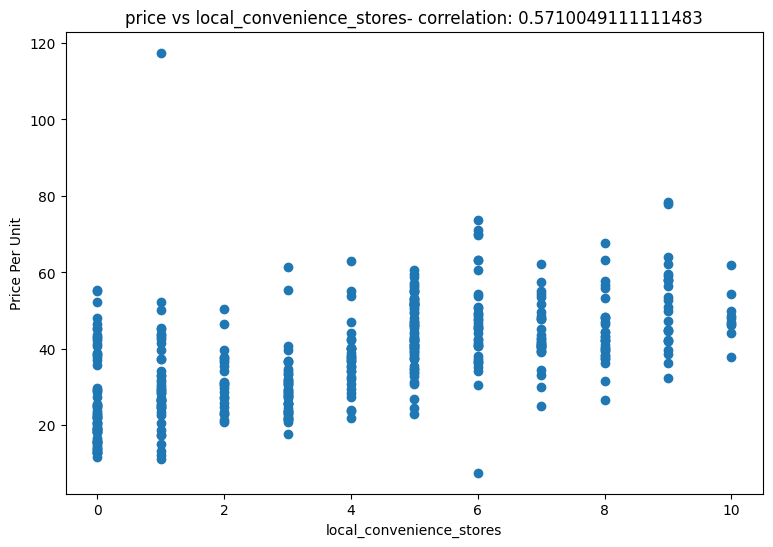

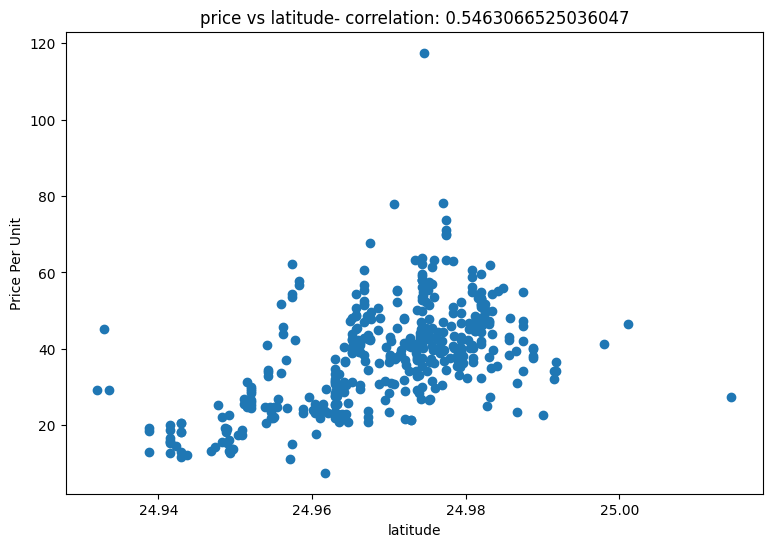

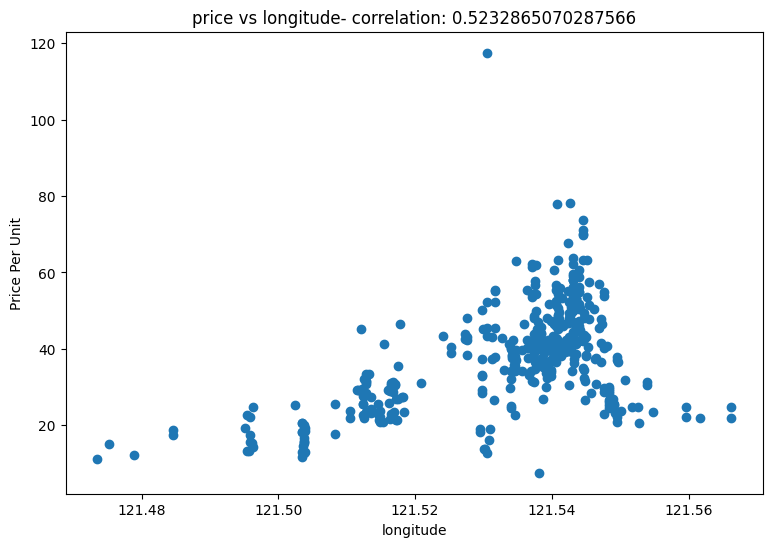

In [6]:
# relation between features and labels
for col in features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['price_per_unit']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Price Per Unit')
    ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
plt.show()

In [7]:
# separate features and labels
X, y = data[features].values, data['price_per_unit'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print(f"Training Set: {X_train.shape[0]} rows\nTest Set: {X_test.shape[0]} rows\n")

Training Set: 289 rows
Test Set: 125 rows



MSE: 71.5813157725615
RMSE: 8.46057419875043
R2: 0.5799815654577279


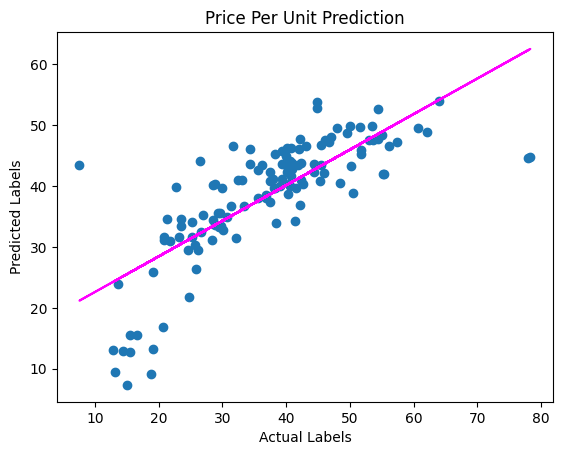

In [8]:
# trying Liner Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Price Per Unit Prediction")

# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(
    y_test,
    p(y_test),
    color='magenta'
)
plt.show()

Using *LinearRegression* gave us RMSE of `8.46`, but not what we want.

Now, we will try some *ensemble* alogrithms.

MSE: 60.819404213676634
RMSE: 7.798679645534661
R2: 0.6431293463675878


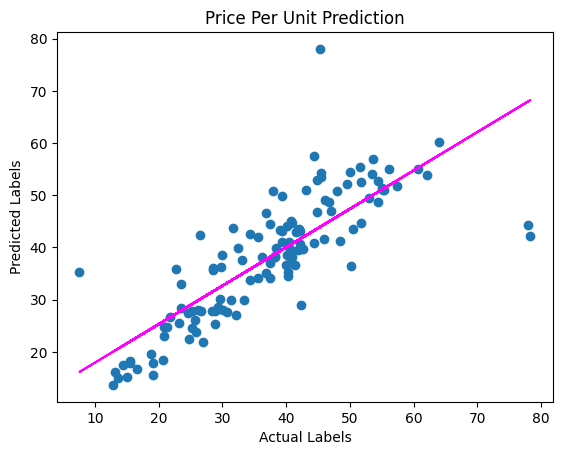

In [9]:
# using Random Forest

model = RandomForestRegressor()
model.fit(X_train, y_train)

# evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Price Per Unit Prediction")

# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(
    y_test,
    p(y_test),
    color='magenta'
)
plt.show()

MSE: 61.592896284538924
RMSE: 7.84811418651251
R2: 0.6385907188608415


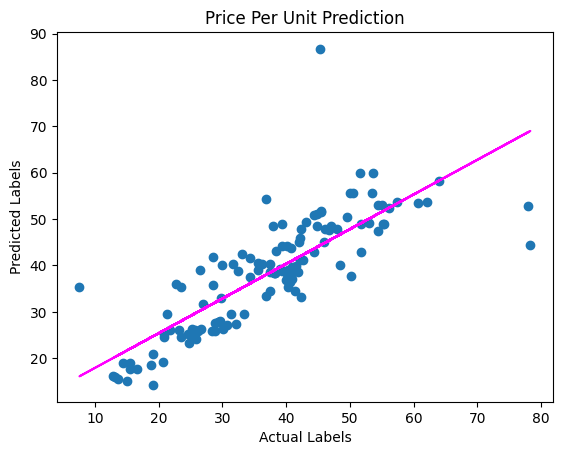

In [10]:
# using Gradient Boosting estimator
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Price Per Unit Prediction")

# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(
    y_test,
    p(y_test),
    color='magenta'
)
plt.show()

*LinerRegression* produced RMSE of `8.46`, *RandomForestRegressor* gave us `7.79` and *GradientBoostingRegressor* gave `7.84`

Let's try using hyperparameters with Gradient Boosting estimator.

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 50} 

GradientBoostingRegressor(n_estimators=50) 

MSE: 60.16294879421964
RMSE: 7.756477860099881
R2: 0.6469812366919174


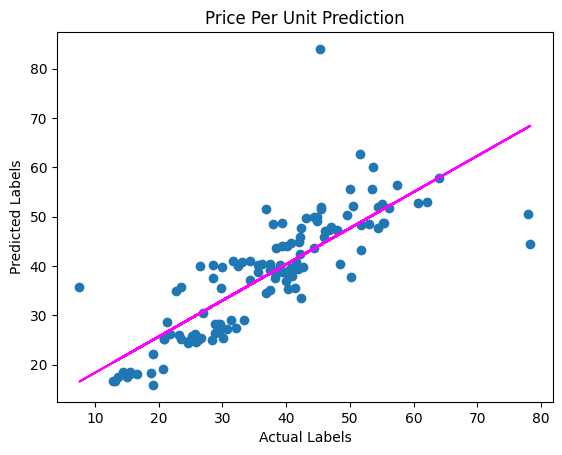

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


# use Gradient Boosting algorithm
algo = GradientBoostingRegressor()

# hyperparameters
params = {
    'learning_rate': [0.1, 0.5, 1],
    'n_estimators': [50, 100, 150]
}


# find best hyperparameter combination to optimize R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(algo, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, '\n')

# get the best model
model = gridsearch.best_estimator_
print(model, '\n')

# evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Price Per Unit Prediction")

# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(
    y_test,
    p(y_test),
    color='magenta'
)
plt.show()

RMSE of 7.75. But we can do better.
Let's use some preprocessing of data to make it easier for the alogrithm to fit a model to it.

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4])])),
                ('regressor', GradientBoostingRegressor(n_estimators=50))])
MSE: 48.045794637247354
RMSE: 6.931507385644724
R2: 0.7180811887560811


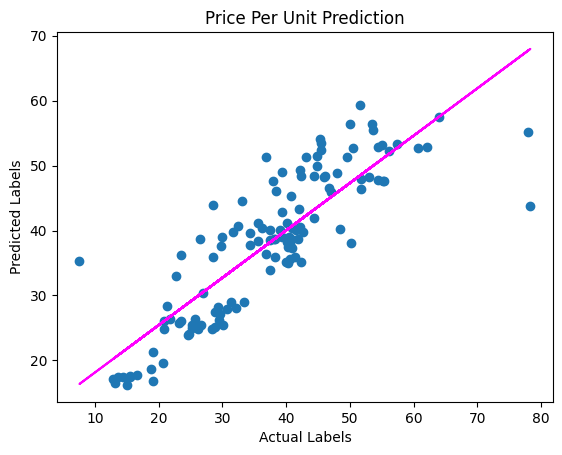

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# define preprocessing for columns
numeric_features = [0,1,2,3,4]
numeric_transformer = Pipeline(
    steps=[(
        'scaler', StandardScaler()
    )]
)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ]
)

# create preprocessing and training pipeline
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor(n_estimators=50, learning_rate=0.1))
    ]
)

model = pipeline.fit(X_train, (y_train))
print(model)

# evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Price Per Unit Prediction")

# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(
    y_test,
    p(y_test),
    color='magenta'
)
plt.show()

In [13]:
import joblib

filename = 'models/real-state.pkl'
joblib.dump(model, filename)

['real-state.pkl']

### Using the trained model

Testing data:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
|------------------|-----------|------------------|--------------------------|----------|-----------|
|     2013.167     |    16.2   |     289.3248	  |             5            | 24.98203 | 121.54348 |
|     2013.000     |    13.6   |     4082.015	  |             0            | 24.94155 | 121.50381 |



In [14]:
X_new = np.array([
    [2013.167, 16.2, 289.3248, 5, 24.98203, 121.54348],
    [2013.000, 13.6, 4082.015, 0, 24.94155, 121.50381]
])

loaded_model = joblib.load('real-state.pkl')

# Use the model to predict rentals
results = loaded_model.predict(X_new)
for prediction in results:
    print(np.round(prediction, 2))

48.25
17.15
